## Bussiness problem : 
### Post liver translplantation patients suffering from renal, hepatic, cardic and other complications

`CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

## project objectives and constraints 
1-Project objective- Maximize early detection of complications 

2-Project Constraint- Minimize regular checkups & treatment Cost
                    - Maximize patients convince 







## Success Criteria
* 1-Business Success Criteria     : Increase the detection of complications by atleast 90%.
* 2-ML Success Criteria           : To achieve accuracy at least 98%.
* 3-Economic Success Criteria     : To save patients medical expences at least 30%.

## Data collection and data processing

  Data Description:
D Age : Age of donor (Numerical)
 
D Gender : The gender of the donor. (Categorical: Male, Female) 

 D BMI : The body mass index (BMI) of the donor. (Numerical)

 D Cause of Death : The cause of death of the liver donor. (Categorical: Accident, Stroke, Other)

D Diabetes : : Indicates whether the donor has diabetes or not. (Binary: 0 - No, 1 - Yes)

 D Hypertension : Indicates whether the patient has hypertension or not. (Binary: 0 - No, 1 - Yes)

D Alcohol Abuse : Indicates whether the liver donor had a history of alcohol abuse. (Binary: 0 - No, 1 - Yes)

 D Smoking : Indicates whether the patient is a smoker or not. (Binary: 0 - No, 1 - Yes)

D Lympochyte : The lymphocyte count of the liver donor. (Numerical)

 D Hepatitis B : Indicates whether the liver donor has hepatitis B or not. (Binary: 0 - No, 1 - Yes)

D Hepatitis C : Indicates whether the liver donor has hepatitis C or not. (Binary: 0 - No, 1 - Yes)

R Etiology : The underlying cause of liver disease leading to transplantation. (Categorical: Alcohol, NAFLD, Hepatitis, Other)

R MELD Score : Model for End-Stage Liver Disease (MELD) score, indicating the severity of liver disease. (Numerical)

R Age : Age of donor (Numerical)

R Gender : The gender of the donor. (Categorical: Male, Female) 

R BMI : The body mass index (BMI) of the recipient. (Numerical)

R Diabetes : Indicates whether the recipient has diabetes or not. (Binary: 0 - No, 1 - Yes)

R Hypertension : Indicates whether the recipient has hypertension or not. (Binary: 0 - No, 1 - Yes)

R Alcohol Abuse : Indicates whether the liver recipient had a history of alcohol abuse. (Binary: 0 - No, 1 - Yes)

R Smoking : Indicates whether the patient is a smoker or not. (Binary: 0 - No, 1 – Yes)

R Lympochyte : The lymphocyte count of the liver recipient. (Numerical)

R Hepatitis B : Indicates whether the liver recipient has hepatitis B or not. (Binary: 0 - No, 1 - Yes)

R Hepatitis C : Indicates whether the liver recipient has hepatitis C or not. (Binary: 0 - No, 1 - Yes)

R Albumin level : The albumin level in the blood of the liver recipient. (Numerical)

R Alcoholic cirrhosis : The  Alcoholic cirrhosis level in the blood of the liver recipient. (Numerical)

R Primary biliary cirrhosis : Indicates whether the liver recipient has primary biliary cirrhosis or not. (Binary: 0 - No, 1 - Yes)

R Na : Sodium level in the blood work of the liver recipient. (Numerical)

R Mg : Magnesium level in the blood work of the liver recipient. (Numerical)

R WBC : White blood cell count work of the liver recipient. (Numerical)

R Platelets : Platelet count of the liver recipient. (Numerical)

R Cold Ischemia Time : The duration of cold ischemia time, representing the time between organ retrieval and transplantation. (Numerical)

R Warm Ischemia Time : The duration of warm ischemia time, representing the time between organ retrieval and transplantation. (Numerical)

R Blood Transfusion : Indicates whether the patient received a blood transfusion during the transplant surgery. (Binary: 0 - No, 1 - Yes)

R Immunosuppressant Medication : The type of immunosuppressant medication prescribed after the transplant. (Categorical: Tacrolimus, Cyclosporine, Other)

R Rejection Episodes :The number of episodes of organ rejection post-transplant. (Numerical)

Complications : The post-surgery complication experienced by the patient. (Categorical: Rejection, Infection, Biliary Complications, Artery Thrombosis, Portal Vein Thrombosis, Primary Graft Non-function, Post-transplant Diabetes, Renal Dysfunction, Cardiovascular Complications, Metabolic Complications)



In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 19.0 MB/s eta 0:00:00


In [2]:
liver_data = pd.read_csv(r'/content/LiverT_dataset.csv')
liver_data

,Column1,D Age,D Gender,D BMI,D Cause of Death,D Diabetes,D Hypertension,D Alcohol Abuse,D Smoking,D Lympochyte,...,R Na,R Mg,R WBC,R Platelets,R Cold Ischemia Time,R Warm Ischemia Time,R Blood Transfusion,R Immunosuppressant Medication,R Rejection Episodes,Complications
0,0,40,Female,32.2,Stroke,1,1,1,0,0,...,5.9,1.5,21310,426232,3.9,2.1,0.0,Cyclosporine,3,Infection
1,1,45,Female,32.1,Other,0,0,0,0,1,...,1.8,0.3,19471,414357,3.4,3.0,0.0,Cyclosporine,1,Artery Thrombosis
2,2,21,Male,26.3,Accident,1,1,0,1,1,...,17.1,1.4,9204,292844,7.2,2.8,NaN,Tacrolimus,4,Post-transplant Diabetes
3,3,41,Female,39.3,Other,1,1,1,0,1,...,18.7,1.3,24350,190143,11.0,2.5,0.0,Other,0,Post-transplant Diabetes
4,4,66,Female,38.4,Accident,1,1,1,0,0,...,7.8,1.2,14871,403780,2.7,1.5,1.0,Other,3,Renal Dysfunction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1934,18,Male,35.3,Other,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,Other,5,Primary Graft Non-function
1938,1934,18,Male,35.3,Other,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,Other,5,Primary Graft Non-function
1939,1935,30,Male,32.8,Stroke,1,1,0,0,1,...,11.0,0.7,22590,255478,8.8,1.6,0.0,Tacrolimus,2,Infection
1940,1936,52,Female,21.0,Other,1,0,1,1,1,...,2.4,0.3,10029,349280,5.4,4.8,0.0,Tacrolimus,5,Portal Vein Thrombosis


In [3]:
# shape of data
liver_data.shape

(1942, 37)

In [4]:
# columns of data 
liver_data.columns

Index(['Column1', 'D Age', 'D Gender', 'D BMI', 'D Cause of Death',
       'D Diabetes', 'D Hypertension', 'D Alcohol Abuse', 'D Smoking',
       'D Lympochyte', 'D Hepatitis B', 'D Hepatitis C', 'R Etiology',
       'R MELD Score', 'R Age', 'R Gender', 'R BMI', 'R Diabetes',
       'R Hypertension', 'R Alcohol Abuse', 'R Smoking', 'R Lympochyte',
       'R Hepatitis B', 'R Hepatitis C', 'R Albumin level',
       'R Alcoholic cirrhosis', 'R Primary biliary cirrhosis', 'R Na', 'R Mg',
       'R WBC', 'R Platelets', 'R Cold Ischemia Time', 'R Warm Ischemia Time',
       'R Blood Transfusion', 'R Immunosuppressant Medication',
       'R Rejection Episodes', 'Complications'],
      dtype='object')

In [5]:
# data info
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Column1                         1942 non-null   int64  
 1   D Age                           1942 non-null   int64  
 2   D Gender                        1942 non-null   object 
 3   D BMI                           1942 non-null   float64
 4   D Cause of Death                1942 non-null   object 
 5   D Diabetes                      1942 non-null   int64  
 6   D Hypertension                  1942 non-null   int64  
 7   D Alcohol Abuse                 1942 non-null   int64  
 8   D Smoking                       1942 non-null   int64  
 9   D Lympochyte                    1942 non-null   int64  
 10  D Hepatitis B                   1941 non-null   float64
 11  D Hepatitis C                   1942 non-null   int64  
 12  R Etiology                      19

In [6]:
# Identify the data types of all columns
column_types = liver_data.dtypes
column_types

Column1                             int64
D Age                               int64
D Gender                           object
D BMI                             float64
D Cause of Death                   object
D Diabetes                          int64
D Hypertension                      int64
D Alcohol Abuse                     int64
D Smoking                           int64
D Lympochyte                        int64
D Hepatitis B                     float64
D Hepatitis C                       int64
R Etiology                         object
R MELD Score                        int64
R Age                               int64
R Gender                           object
R BMI                             float64
R Diabetes                          int64
R Hypertension                      int64
R Alcohol Abuse                     int64
R Smoking                           int64
R Lympochyte                      float64
R Hepatitis B                       int64
R Hepatitis C                     

In [7]:
# finding categorical columns from data 
liver_data_cat_cols = column_types[column_types == 'object'].index.tolist()
liver_data_cat_cols

['D Gender',
 'D Cause of Death',
 'R Etiology',
 'R Gender',
 'R Immunosuppressant Medication',
 'Complications']

In [9]:
# Apply label encoding to the categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in liver_data_cat_cols:
    liver_data[col] = label_encoder.fit_transform(liver_data[col])

In [11]:
liver_data

,Column1,D Age,D Gender,D BMI,D Cause of Death,D Diabetes,D Hypertension,D Alcohol Abuse,D Smoking,D Lympochyte,...,R Na,R Mg,R WBC,R Platelets,R Cold Ischemia Time,R Warm Ischemia Time,R Blood Transfusion,R Immunosuppressant Medication,R Rejection Episodes,Complications
0,0,40,0,32.2,2,1,1,1,0,0,...,5.9,1.5,21310,426232,3.9,2.1,0.0,0,3,3
1,1,45,0,32.1,1,0,0,0,0,1,...,1.8,0.3,19471,414357,3.4,3.0,0.0,0,1,0
2,2,21,1,26.3,0,1,1,0,1,1,...,17.1,1.4,9204,292844,7.2,2.8,NaN,2,4,7
3,3,41,0,39.3,1,1,1,1,0,1,...,18.7,1.3,24350,190143,11.0,2.5,0.0,1,0,7
4,4,66,0,38.4,0,1,1,1,0,0,...,7.8,1.2,14871,403780,2.7,1.5,1.0,1,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1934,18,1,35.3,1,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,1,5,8
1938,1934,18,1,35.3,1,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,1,5,8
1939,1935,30,1,32.8,2,1,1,0,0,1,...,11.0,0.7,22590,255478,8.8,1.6,0.0,2,2,3
1940,1936,52,0,21.0,1,1,0,1,1,1,...,2.4,0.3,10029,349280,5.4,4.8,0.0,2,5,6


In [12]:
# Select integer columns
integer_columns = liver_data.select_dtypes(include=['int', 'int64']).columns
print(integer_columns)

Index(['Column1', 'D Age', 'D Gender', 'D Cause of Death', 'D Diabetes',
       'D Hypertension', 'D Alcohol Abuse', 'D Smoking', 'D Lympochyte',
       'D Hepatitis C', 'R Etiology', 'R MELD Score', 'R Age', 'R Gender',
       'R Diabetes', 'R Hypertension', 'R Alcohol Abuse', 'R Smoking',
       'R Hepatitis B', 'R Hepatitis C', 'R Albumin level',
       'R Alcoholic cirrhosis', 'R WBC', 'R Platelets',
       'R Immunosuppressant Medication', 'R Rejection Episodes',
       'Complications'],
      dtype='object')


In [13]:
# typecasting of data
liver_data[integer_columns] = liver_data[integer_columns].astype(float)
liver_data[integer_columns]

,Column1,D Age,D Gender,D Cause of Death,D Diabetes,D Hypertension,D Alcohol Abuse,D Smoking,D Lympochyte,D Hepatitis C,...,R Smoking,R Hepatitis B,R Hepatitis C,R Albumin level,R Alcoholic cirrhosis,R WBC,R Platelets,R Immunosuppressant Medication,R Rejection Episodes,Complications
0,0.0,40.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33.0,84.0,21310.0,426232.0,0.0,3.0,3.0
1,1.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,30.0,63.0,19471.0,414357.0,0.0,1.0,0.0
2,2.0,21.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,33.0,85.0,9204.0,292844.0,2.0,4.0,7.0
3,3.0,41.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,45.0,16.0,24350.0,190143.0,1.0,0.0,7.0
4,4.0,66.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,31.0,87.0,14871.0,403780.0,1.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1934.0,18.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,50.0,56.0,21195.0,259229.0,1.0,5.0,8.0
1938,1934.0,18.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,50.0,56.0,21195.0,259229.0,1.0,5.0,8.0
1939,1935.0,30.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,39.0,47.0,22590.0,255478.0,2.0,2.0,3.0
1940,1936.0,52.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,43.0,12.0,10029.0,349280.0,2.0,5.0,6.0


In [38]:
# drop unwanted column
liver_data = liver_data.drop(columns = 'Column1')
liver_data

,D Age,D Gender,D BMI,D Cause of Death,D Diabetes,D Hypertension,D Alcohol Abuse,D Smoking,D Lympochyte,D Hepatitis B,...,R Na,R Mg,R WBC,R Platelets,R Cold Ischemia Time,R Warm Ischemia Time,R Blood Transfusion,R Immunosuppressant Medication,R Rejection Episodes,Complications
0,40.0,0.0,32.2,2.0,1.0,1.0,1.0,0.0,0.0,1.0,...,5.9,1.5,21310.0,426232.0,3.9,2.1,0.0,0.0,3.0,3.0
1,45.0,0.0,32.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.8,0.3,19471.0,414357.0,3.4,3.0,0.0,0.0,1.0,0.0
2,21.0,1.0,26.3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,17.1,1.4,9204.0,292844.0,7.2,2.8,NaN,2.0,4.0,7.0
3,41.0,0.0,39.3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,18.7,1.3,24350.0,190143.0,11.0,2.5,0.0,1.0,0.0,7.0
4,66.0,0.0,38.4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,7.8,1.2,14871.0,403780.0,2.7,1.5,1.0,1.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,18.0,1.0,35.3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,15.4,0.9,21195.0,259229.0,2.5,1.9,0.0,1.0,5.0,8.0
1938,18.0,1.0,35.3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,15.4,0.9,21195.0,259229.0,2.5,1.9,0.0,1.0,5.0,8.0
1939,30.0,1.0,32.8,2.0,1.0,1.0,0.0,0.0,1.0,1.0,...,11.0,0.7,22590.0,255478.0,8.8,1.6,0.0,2.0,2.0,3.0
1940,52.0,0.0,21.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,...,2.4,0.3,10029.0,349280.0,5.4,4.8,0.0,2.0,5.0,6.0


In [39]:
# missing values

liver_data.isnull().sum()

D Age                             0
D Gender                          0
D BMI                             0
D Cause of Death                  0
D Diabetes                        0
D Hypertension                    0
D Alcohol Abuse                   0
D Smoking                         0
D Lympochyte                      0
D Hepatitis B                     1
D Hepatitis C                     0
R Etiology                        0
R MELD Score                      0
R Age                             0
R Gender                          0
R BMI                             1
R Diabetes                        0
R Hypertension                    0
R Alcohol Abuse                   0
R Smoking                         0
R Lympochyte                      1
R Hepatitis B                     0
R Hepatitis C                     0
R Albumin level                   0
R Alcoholic cirrhosis             0
R Primary biliary cirrhosis       0
R Na                              0
R Mg                        

In [40]:
#mean imputation 

# Calculate the mean of each column
column_means = liver_data.mean()
column_means

D Age                                 44.181771
D Gender                               0.496910
D BMI                                 29.077240
D Cause of Death                       1.009784
D Diabetes                             0.736354
D Hypertension                         0.792482
D Alcohol Abuse                        0.465499
D Smoking                              0.233780
D Lympochyte                           0.610711
D Hepatitis B                          0.493045
D Hepatitis C                          0.409887
R Etiology                             1.531926
R MELD Score                          20.674047
R Age                                 44.799691
R Gender                               0.492276
R BMI                                 24.873416
R Diabetes                             0.681256
R Hypertension                         0.123584
R Alcohol Abuse                        0.285788
R Smoking                              0.147786
R Lympochyte                           0

In [41]:
# duplicated values
liver_data_duplicated = liver_data_drop.duplicated()
liver_data_duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
1937    False
1938     True
1939    False
1940    False
1941    False
Length: 1942, dtype: bool

In [42]:
# drop duplicated value
liver_data.drop_duplicates()

,D Age,D Gender,D BMI,D Cause of Death,D Diabetes,D Hypertension,D Alcohol Abuse,D Smoking,D Lympochyte,D Hepatitis B,...,R Na,R Mg,R WBC,R Platelets,R Cold Ischemia Time,R Warm Ischemia Time,R Blood Transfusion,R Immunosuppressant Medication,R Rejection Episodes,Complications
0,40.0,0.0,32.2,2.0,1.0,1.0,1.0,0.0,0.0,1.0,...,5.9,1.5,21310.0,426232.0,3.9,2.1,0.0,0.0,3.0,3.0
1,45.0,0.0,32.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.8,0.3,19471.0,414357.0,3.4,3.0,0.0,0.0,1.0,0.0
2,21.0,1.0,26.3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,17.1,1.4,9204.0,292844.0,7.2,2.8,NaN,2.0,4.0,7.0
3,41.0,0.0,39.3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,18.7,1.3,24350.0,190143.0,11.0,2.5,0.0,1.0,0.0,7.0
4,66.0,0.0,38.4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,7.8,1.2,14871.0,403780.0,2.7,1.5,1.0,1.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,49.0,0.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,7.8,0.0,14412.0,235741.0,8.6,1.0,0.0,0.0,0.0,1.0
1937,18.0,1.0,35.3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,15.4,0.9,21195.0,259229.0,2.5,1.9,0.0,1.0,5.0,8.0
1939,30.0,1.0,32.8,2.0,1.0,1.0,0.0,0.0,1.0,1.0,...,11.0,0.7,22590.0,255478.0,8.8,1.6,0.0,2.0,2.0,3.0
1940,52.0,0.0,21.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,...,2.4,0.3,10029.0,349280.0,5.4,4.8,0.0,2.0,5.0,6.0


In [43]:
liver_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1937    False
1938     True
1939    False
1940    False
1941    False
Length: 1942, dtype: bool

## Exploratory Data Analysis 

In [44]:
# first business decision
print(liver_data.mean())
print('\n')
print(liver_data.median())
print('\n')
print(liver_data.mode())

D Age                                 44.181771
D Gender                               0.496910
D BMI                                 29.077240
D Cause of Death                       1.009784
D Diabetes                             0.736354
D Hypertension                         0.792482
D Alcohol Abuse                        0.465499
D Smoking                              0.233780
D Lympochyte                           0.610711
D Hepatitis B                          0.493045
D Hepatitis C                          0.409887
R Etiology                             1.531926
R MELD Score                          20.674047
R Age                                 44.799691
R Gender                               0.492276
R BMI                                 24.873416
R Diabetes                             0.681256
R Hypertension                         0.123584
R Alcohol Abuse                        0.285788
R Smoking                              0.147786
R Lympochyte                           0

***2nd Moment Business Decision (Measures of Dispersion)***

1) Variance

2) Standard deviation

3) Range (maximum - minimum)

In [45]:
print(liver_data.var())
print('\n')
print(liver_data.std())
print('\n')

D Age                             2.276511e+02
D Gender                          2.501192e-01
D BMI                             4.031162e+01
D Cause of Death                  6.598733e-01
D Diabetes                        1.942367e-01
D Hypertension                    1.645390e-01
D Alcohol Abuse                   2.489379e-01
D Smoking                         1.792190e-01
D Lympochyte                      2.378656e-01
D Hepatitis B                     2.500805e-01
D Hepatitis C                     2.420042e-01
R Etiology                        1.253746e+00
R MELD Score                      2.976645e+01
R Age                             2.259985e+02
R Gender                          2.510995e-01
R BMI                             2.321357e+01
R Diabetes                        2.172580e-01
R Hypertension                    1.083667e-01
R Alcohol Abuse                   2.042183e-01
R Smoking                         1.260100e-01
R Lympochyte                      2.399789e-01
R Hepatitis B

In [46]:
# third business decision
liver_data.skew()

D Age                            -0.042691
D Gender                          0.012368
D BMI                            -0.010029
D Cause of Death                 -0.017891
D Diabetes                       -1.073681
D Hypertension                   -1.443584
D Alcohol Abuse                   0.138439
D Smoking                         1.259003
D Lympochyte                     -0.454465
D Hepatitis B                     0.027845
D Hepatitis C                     0.366737
R Etiology                       -0.041381
R MELD Score                      0.077396
R Age                            -0.066084
R Gender                          0.043220
R BMI                            -0.003767
R Diabetes                       -0.778544
R Hypertension                    2.289273
R Alcohol Abuse                   0.949018
R Smoking                         1.986469
R Lympochyte                      0.411635
R Hepatitis B                     1.539530
R Hepatitis C                     0.791317
R Albumin l

In [47]:
# forth bussiness decision 
liver_data.kurt()

D Age                            -1.173611
D Gender                         -2.001910
D BMI                            -1.204316
D Cause of Death                 -1.484297
D Diabetes                       -0.848083
D Hypertension                    0.084021
D Alcohol Abuse                  -1.982878
D Smoking                        -0.415340
D Lympochyte                     -1.795311
D Hepatitis B                    -2.001288
D Hepatitis C                    -1.867428
R Etiology                       -1.354236
R MELD Score                     -1.180970
R Age                            -1.151490
R Gender                         -1.967577
R BMI                            -0.526041
R Diabetes                       -1.395308
R Hypertension                    3.244112
R Alcohol Abuse                  -1.100500
R Smoking                         1.948064
R Lympochyte                     -1.832446
R Hepatitis B                     0.370534
R Hepatitis C                    -1.375234
R Albumin l

# outlier analysis by box plot

In [48]:
# Select the columns for outlier analysis
columns = liver_data.columns[:56]

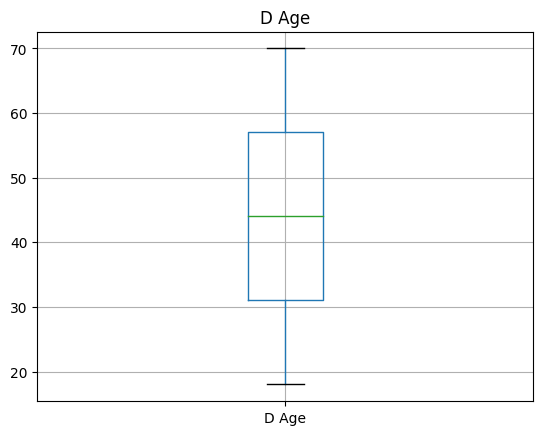

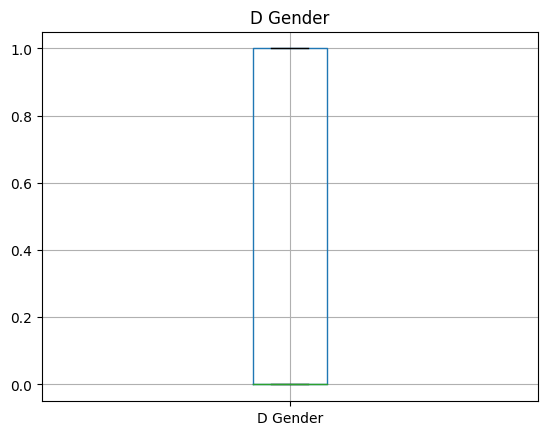

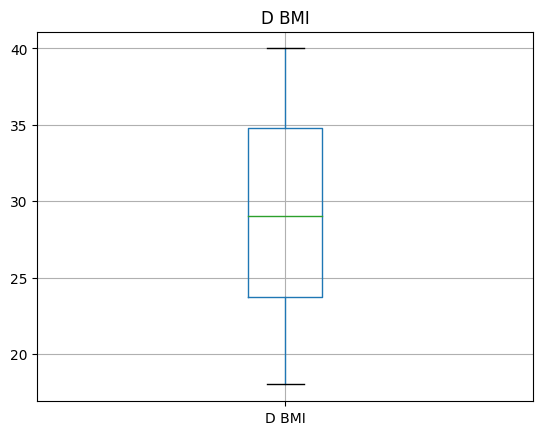

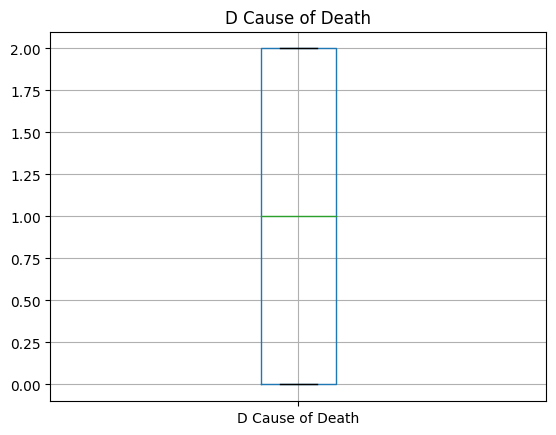

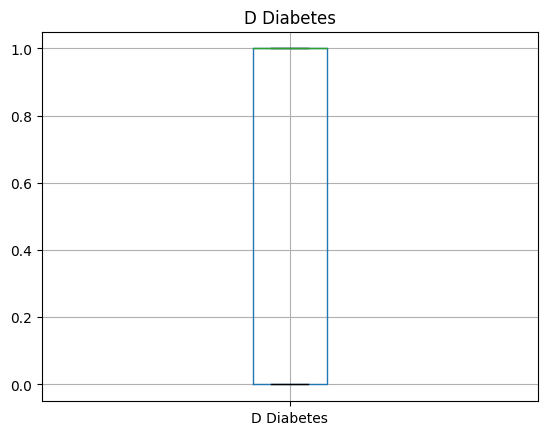

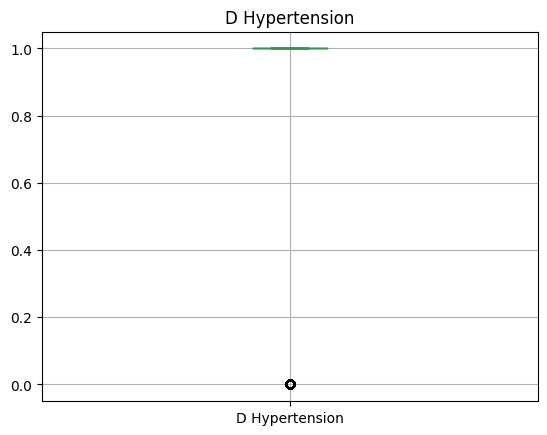

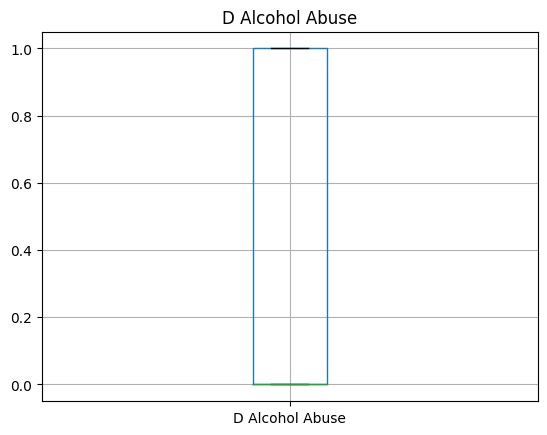

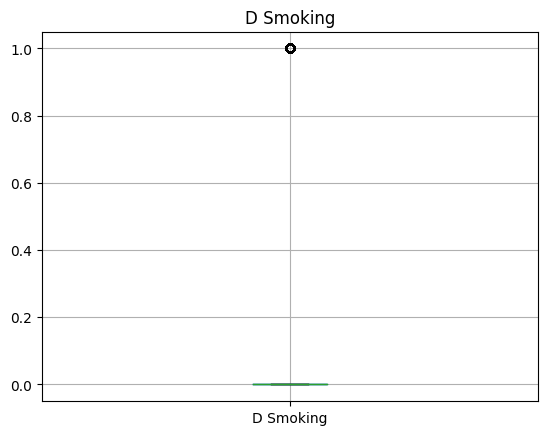

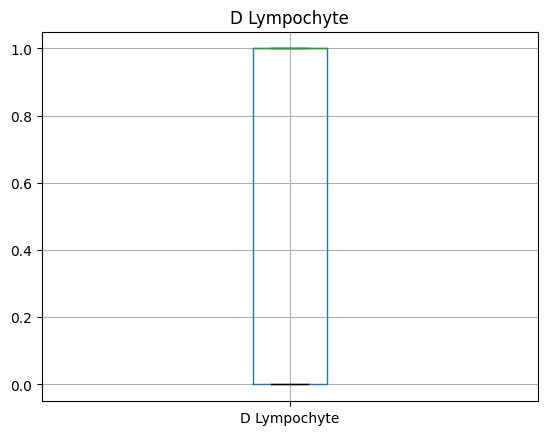

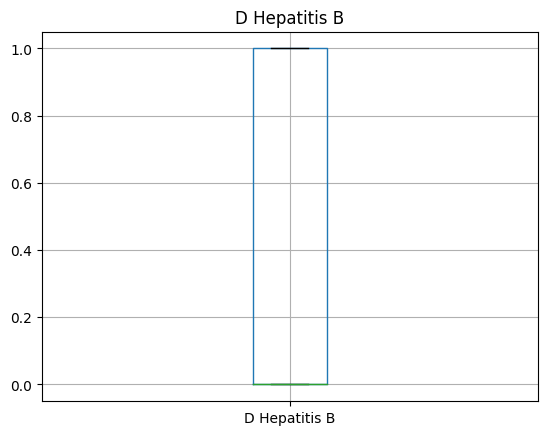

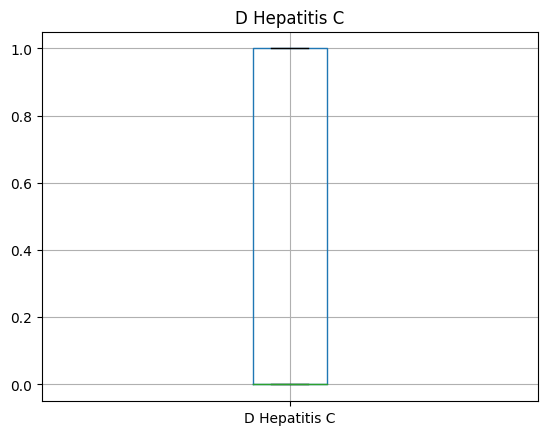

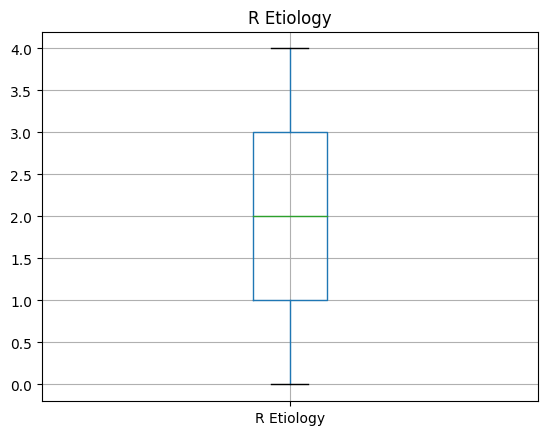

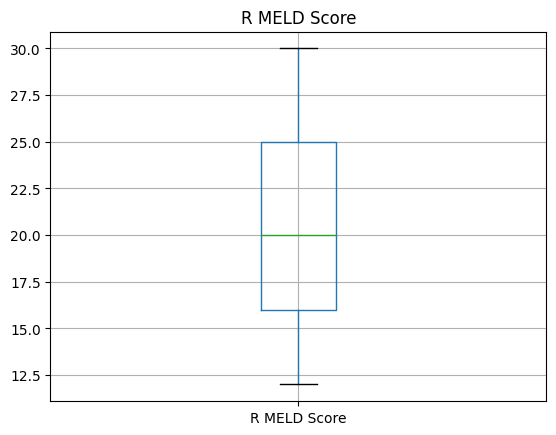

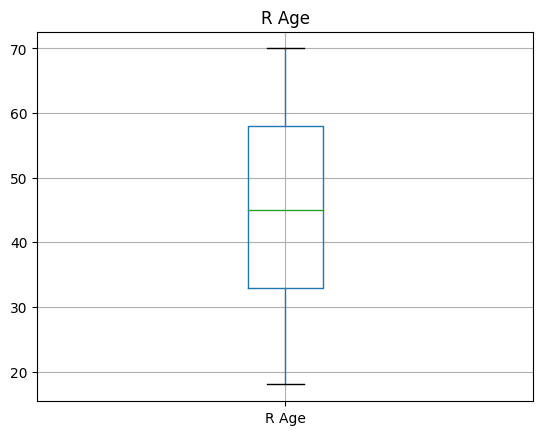

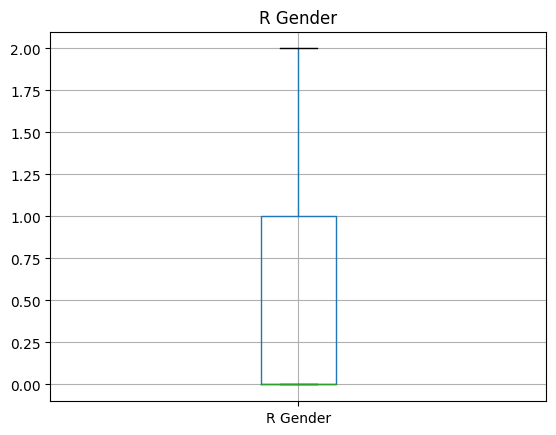

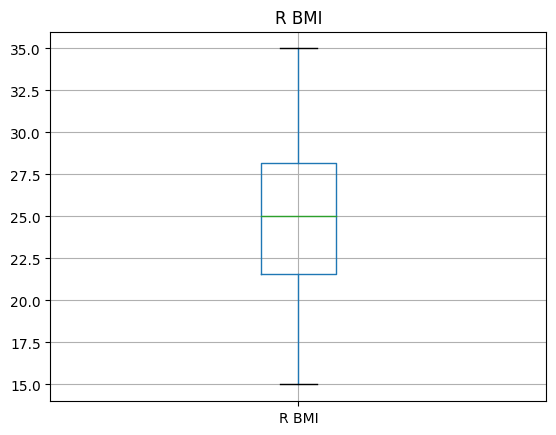

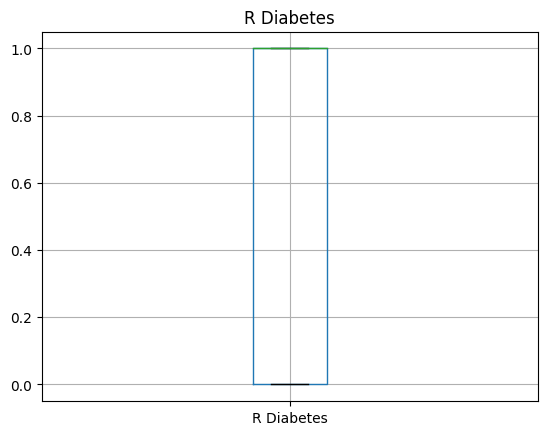

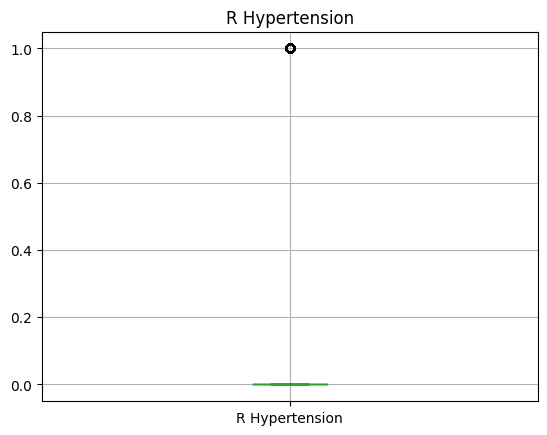

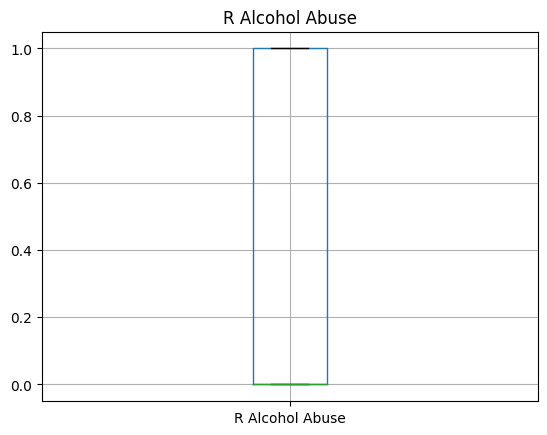

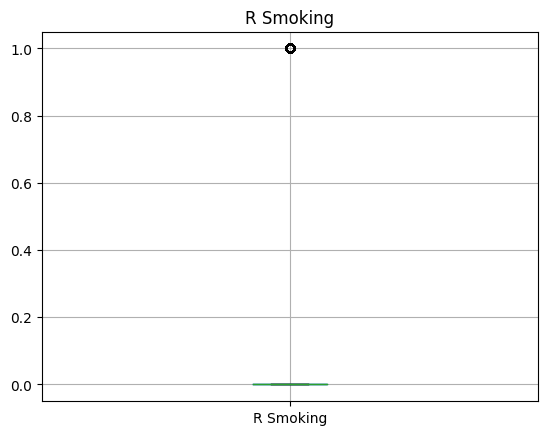

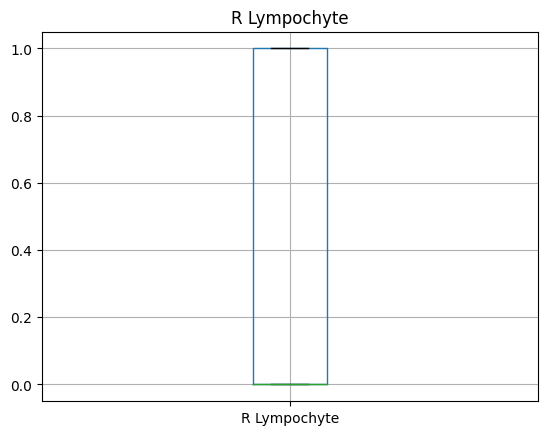

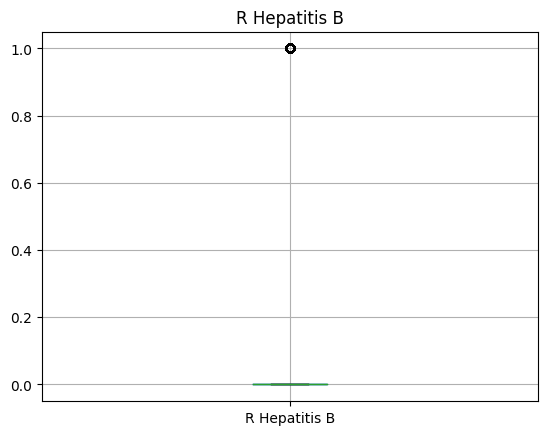

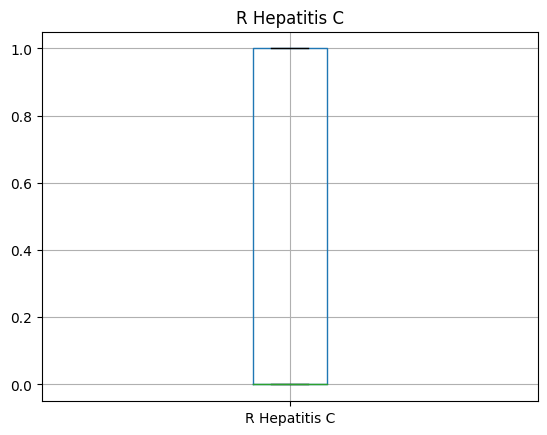

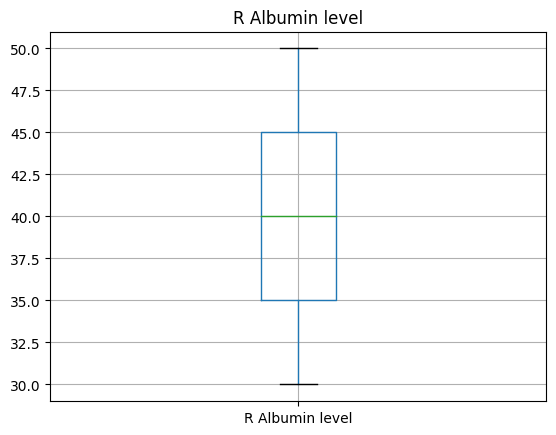

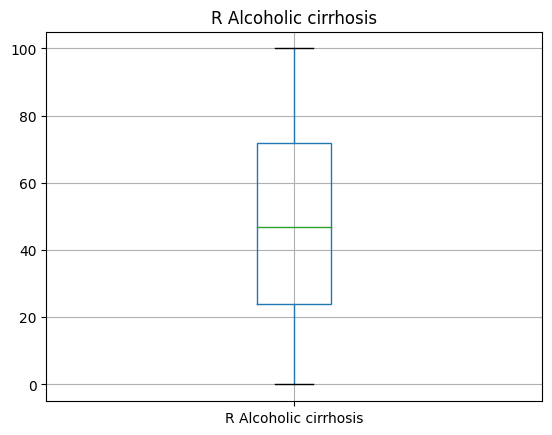

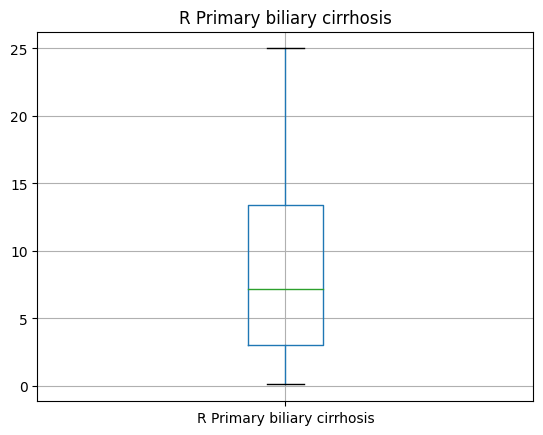

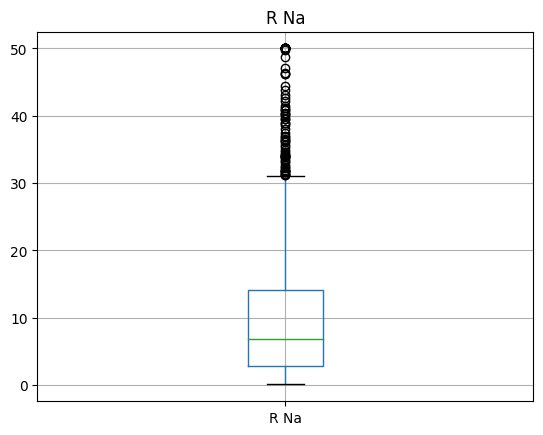

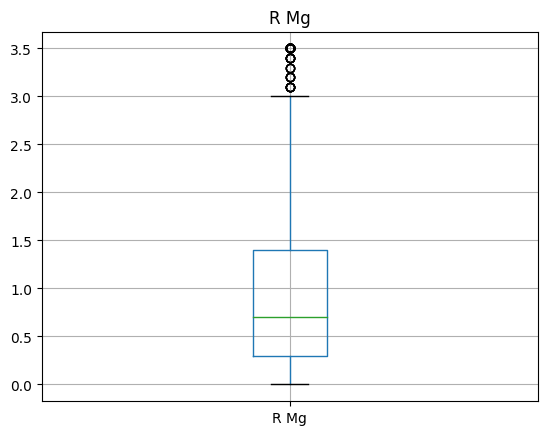

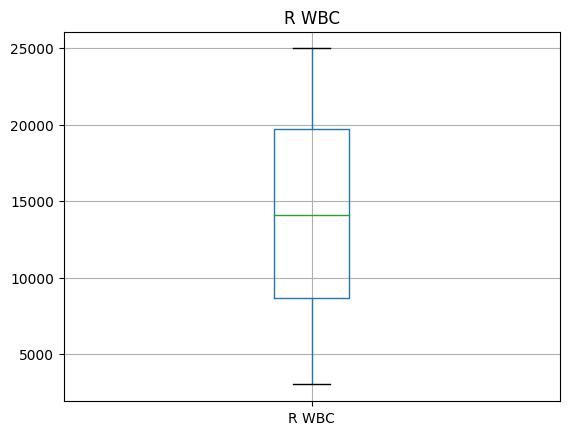

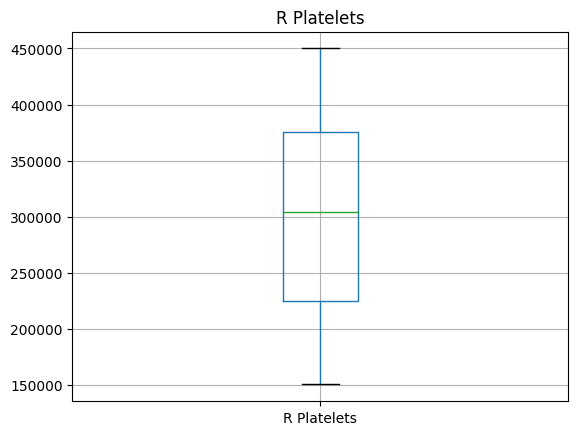

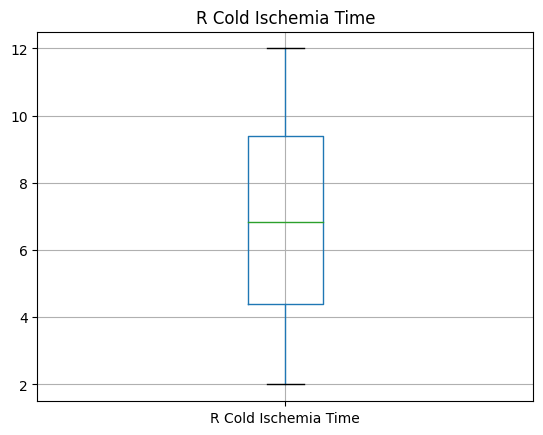

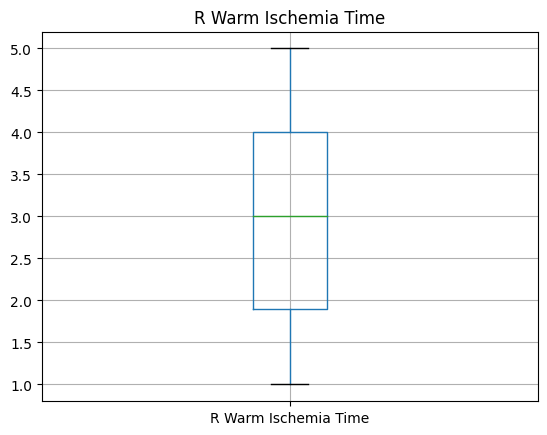

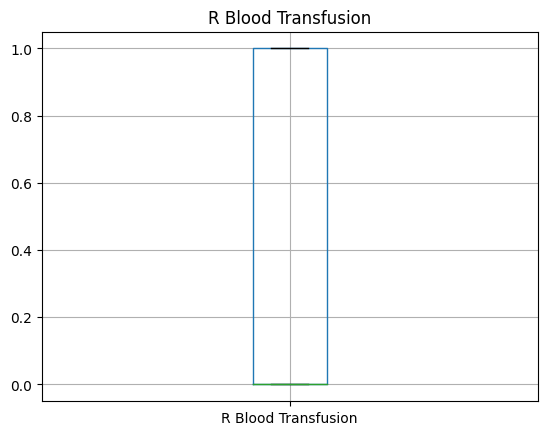

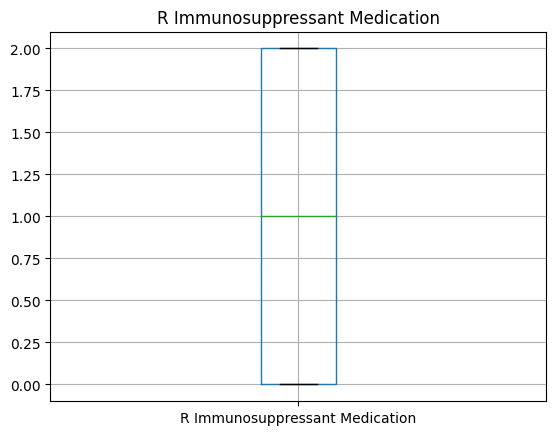

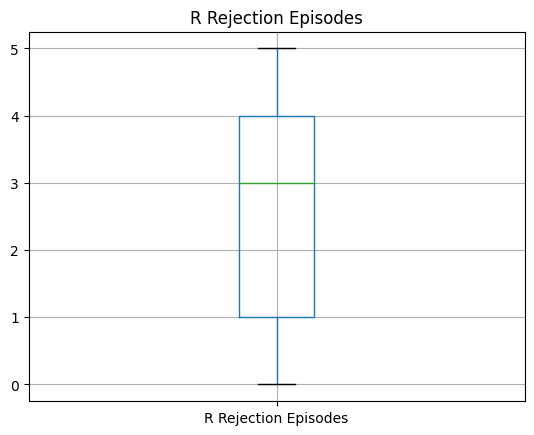

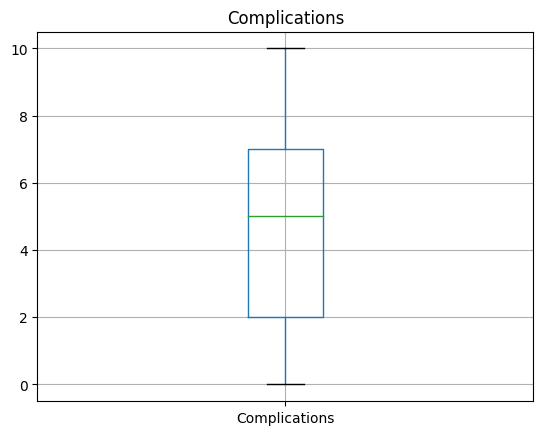

In [49]:
# Create box plots for each column
for column in columns:
    plt.figure()
    liver_data.boxplot(column=column)
    plt.title(column)
    plt.show()

In [51]:
# winserisation for outliers 
# import required libraires
from scipy.stats.mstats import winsorize
# Select the columns for winsorization
columns = liver_data.columns[:56]

In [57]:
# Apply winsorization to each column
for column in columns:
    winsorized_values = winsorize(liver_data[column], limits=[0.05, 0.05])
    liver_data[column] = winsorized_values
    liver_data 